In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体  
  
mpl.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题

In [3]:
accident_data=pd.read_csv("accident_data_processed.csv",encoding="utf-8")
weather_data=pd.read_csv("weather_data_processed.csv",encoding="utf-8")
illegal_data=pd.read_csv("illegal_driver.csv",encoding="utf-8")
map_data=pd.read_csv("map_info.csv",encoding="utf-8")
print(accident_data.head(3))
print(weather_data.head(3))
print(illegal_data.head(3))
print(map_data.head(3))

   Unnamed: 0         accidenttime accidentaddr  driver1fault  \
0           0  2015-01-02 04:20:00          白云区             9   
1           1  2015-01-05 17:05:00          北二环             1   
2           2  2015-01-05 17:30:00        兴关路路口             7   

  driver1responsibility driver2responsibility  sex1 platenumber1 carcolor1  \
0                 负同等责任                 负同等责任     1      贵AU2906         黑   
1                 负全部责任                  不负责任     1      贵A7160F         红   
2                 负全部责任                  不负责任     1      贵A31L88        白色   

   sex2  ...   is_driver2_province driver1_days driver2_days driver1_years  \
0     1  ...                  True          NaN          NaN           NaN   
1     1  ...                  True       1995.0       1414.0           3.0   
2     1  ...                  True       2728.0       1011.0           2.0   

  driver2_years driver1_age driver2_age difference_age clcpp1 clcpp2  
0           -27        31.0        33.0   

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
accident_data.accidenttime=pd.to_datetime(accident_data.accidenttime)
accident_data.accidenttime=accident_data.accidenttime.dt.date
print(accident_data.accidenttime.head(5))
weather_data.accidenttime=pd.to_datetime(weather_data.accidenttime)
weather_data.accidenttime=weather_data.accidenttime.dt.date
print(weather_data.accidenttime.head(5))

0    2015-01-02
1    2015-01-05
2    2015-01-05
3    2015-01-06
4    2015-01-07
Name: accidenttime, dtype: object
0    2015-01-01
1    2015-01-02
2    2015-01-03
3    2015-01-04
4    2015-01-05
Name: accidenttime, dtype: object


In [5]:
accident_data=accident_data.merge(weather_data,how="left",on="accidenttime")

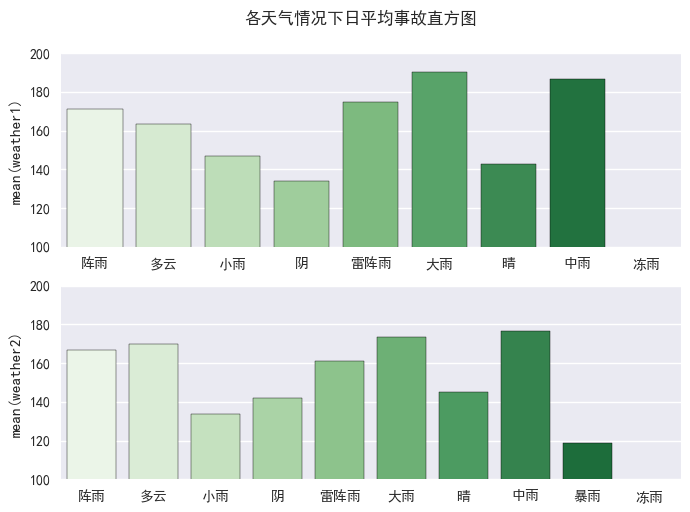

In [6]:
weather1_days=weather_data["weather1"].value_counts().drop("雨夹雪").reindex(accident_data["weather1"].value_counts().index)
weather2_days=weather_data["weather2"].value_counts().reindex(accident_data["weather2"].value_counts().index)
# print(accident_data["weather2"].value_counts())
weather1_per=accident_data["weather1"].value_counts()/weather1_days
weather2_per=accident_data["weather2"].value_counts()/weather2_days
# print(weather2_days)
# print(weather1_per)
# print(weather2_per)
fig,axes=plt.subplots(2,1)
weather1_per=weather1_per.reindex(["阵雨","多云","小雨","阴","雷阵雨","大雨","晴","中雨","冻雨"])
fig.suptitle("各天气情况下日平均事故直方图")
sns.barplot(weather1_per.index,weather1_per,palette="Greens",ax=axes[0])
axes[0].set_ylim(100,200)
sns.barplot(weather2_per.index,weather2_per,palette="Greens",ax=axes[1])
axes[1].set_ylim(100,200)
plt.show()
fig.savefig("weather_hist.png")

从上图可以看到，大雨和中雨的天气下发生事故数明显高于其他天气。由于暴雨本身出现的次数较少，且仅在weather2中出现，实际上仍是weather1为大雨的情况，所以天气对交通事故的产生有明显影响的

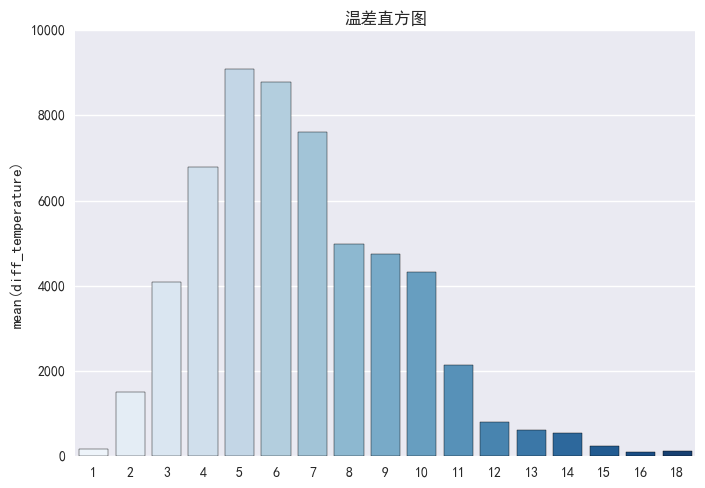

In [28]:
diff_temp_count=accident_data.diff_temperature.value_counts().reindex([i for i in range(1,19)])
diff_temp_count=diff_temp_count.drop(17,axis=0)
# print(diff_temp_count)
fig,ax=plt.subplots(1,1)
plt.title("温差直方图")
snsplt=sns.barplot(diff_temp_count.index,diff_temp_count,palette="Blues",ax=ax)
plt.show()
fig.savefig("diff_tempture.png")

可以看到，温差直方图分布正态的，温差在5°，6°的事故数量最多

In [8]:
# print(accident_data.wind1.value_counts())
# print(accident_data.wind2.value_counts())
# print(weather_data.wind1.value_counts())
wind1_per=accident_data.wind1.value_counts()/weather_data.wind1.value_counts()
print(wind1_per)

东北风    151.403409
南风     151.966667
东南风    169.089286
东风     159.488372
Name: wind1, dtype: float64


In [9]:
# print(accident_data.wind2.value_counts())
# print(accident_data.wind2.value_counts())
# print(weather_data.wind2.value_counts())
wind2_per=accident_data.wind2.value_counts()/weather_data.wind2.value_counts()
print(wind2_per)

东北风    151.250000
南风     157.519608
东南风    161.890909
东风     158.125000
Name: wind2, dtype: float64


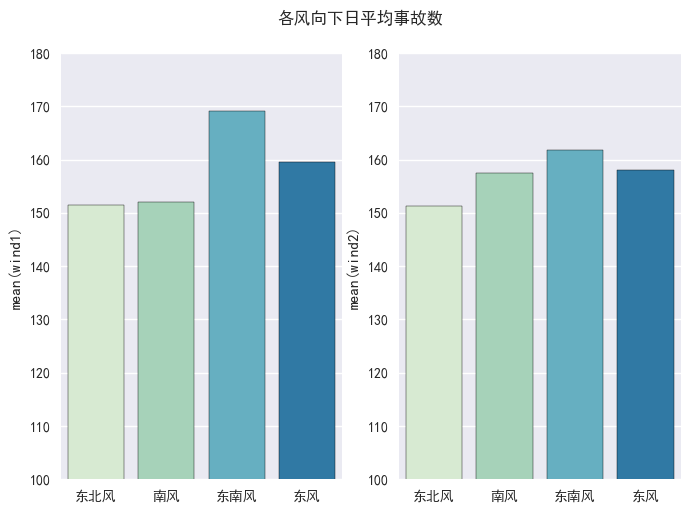

In [10]:
fig,axes=plt.subplots(1,2)
fig.suptitle("各风向下日平均事故数")
sns.barplot(wind1_per.index,wind1_per,palette="GnBu",ax=axes[0])
axes[0].set_ylim(100,180)
axes[1].set_ylim(100,180)
sns.barplot(wind2_per.index,wind2_per,palette="GnBu",ax=axes[1])
plt.show()
fig.savefig("wind_hist.png")

两个风向指标都表明东南风发生事故的次数最大，其他风向差别不大

In [11]:
print(accident_data.info())
print(accident_data.accidentaddr.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56651 entries, 0 to 56650
Data columns (total 58 columns):
Unnamed: 0               56651 non-null int64
accidenttime             56651 non-null object
accidentaddr             56651 non-null object
driver1fault             56651 non-null int64
driver1responsibility    56651 non-null object
driver2responsibility    56651 non-null object
sex1                     56651 non-null int64
platenumber1             56651 non-null object
carcolor1                56650 non-null object
sex2                     56651 non-null int64
platenumber2             56651 non-null object
carcolor2                56651 non-null object
jxmc1                    56651 non-null object
jxmc2                    56651 non-null object
cclzrq1                  56651 non-null object
cclzrq2                  56651 non-null object
clpp1                    56651 non-null object
clpp2                    56651 non-null object
driver1license           56651 non-null object
dr

In [12]:
district=map_data.district
print(len(district[district.isnull()==True].index))

6816


In [13]:
accident_data["district"]=district
accident_data["lng"]=map_data["lngs"]
accident_data["lat"]=map_data["lat"]
print(accident_data.loc[0:11,["district","lng","lat"]])

   district         lng        lat
0       白云区  106.629636  26.684248
1       乌当区  106.748315  26.623418
2       南明区  106.721021  26.572259
3       乌当区  106.663792  26.609576
4       南明区  106.719066  26.551241
5       南明区  106.717496  26.565438
6       乌当区  106.586442  26.603323
7       云岩区  106.687222  26.587497
8       白云区  106.642799  26.683436
9       白云区  106.659356  26.675704
10      乌当区  106.638316  26.612034
11      乌当区  106.582058  26.588850


将map_data数据集与accident_data数据集合并，其中由于位置信息的不准确，无法获取准确区域信息，故存在有6816条空数据

南明区     13949
云岩区     11862
乌当区      9754
花溪区      7550
观山湖区     3894
白云区      2826
Name: district, dtype: int64


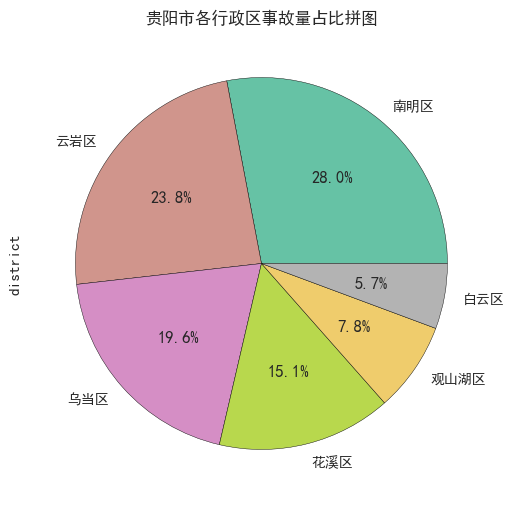

In [14]:
district_count=accident_data.district.value_counts()
print(district_count)
fig=plt.figure(facecolor="white",figsize=(6,6))
district_count.plot(kind="pie",cmap="Set2",autopct='%1.1f%%')
plt.title("贵阳市各行政区事故量占比拼图")
plt.show()
fig.savefig("district_hist.png")

上图表面，云岩区，乌当区和南明区发生交通事故的概率远远大于其他三区

In [15]:
accident_data=accident_data.merge\
            (illegal_data,how="left",left_on="driver1license",right_on="jszh")
accident_data=accident_data.merge\
            (illegal_data,how="left",left_on="driver2license",right_on="jszh")
print(accident_data.columns)

Index(['Unnamed: 0', 'accidenttime', 'accidentaddr', 'driver1fault',
       'driver1responsibility', 'driver2responsibility', 'sex1',
       'platenumber1', 'carcolor1', 'sex2', 'platenumber2', 'carcolor2',
       'jxmc1', 'jxmc2', 'cclzrq1', 'cclzrq2', 'clpp1', 'clpp2',
       'driver1license', 'driver2license', 'brith1', 'brith2',
       'accident_month', 'accident_quarter', 'accident_weekday',
       'accident_day', 'accident_hour', 'accident_minute', 'is_province1',
       'is_province2', 'is_city1', 'is_city2', 'is_private', 'end_number1',
       'end_number2', 'is_private1', 'is_private2', 'is_driver1_city',
       'is_driver2_city', 'is_driver1_province', 'is_driver2_province',
       'driver1_days', 'driver2_days', 'driver1_years', 'driver2_years',
       'driver1_age', 'driver2_age', 'difference_age', 'clcpp1', 'clcpp2',
       'id_x', 'temperature_min', 'temperature_max', 'weather1', 'weather2',
       'wind1', 'wind2', 'diff_temperature', 'district', 'lng', 'lat', 'id_y',
  

In [16]:
driver1_illegal=accident_data.loc[:,
      ["driver1license","jszh_x","fine_x","score_x","maxtime_x","xfcount_x","wfxw_x"]]
print(driver1_illegal.loc[driver1_illegal["jszh_x"].isnull()==False].count())

driver2_illegal=accident_data.loc[:,
      ["driver2license","jszh_y","fine_y","score_y","maxtime_y","xfcount_y","wfxw_y"]]
print(driver2_illegal.loc[driver2_illegal["jszh_y"].isnull()==False].count())

driver1license    20396
jszh_x            20396
fine_x            20396
score_x           20396
maxtime_x         20396
xfcount_x         20396
wfxw_x            20396
dtype: int64
driver2license    19992
jszh_y            19992
fine_y            19992
score_y           19992
maxtime_y         19992
xfcount_y         19992
wfxw_y            19992
dtype: int64


In [17]:
print(illegal_data.count())
# print(illegal_per)

id         33123
jszh       33123
fine       33123
score      33123
maxtime    33123
xfcount    33123
wfxw       33123
dtype: int64


可以看到仅有20396第一责任在违法表中出现过，剩下的36255条第一责任人在违法表中没有数据信息<br>
而第二责任人中有19992位出现在违法表中，所以总体上40%左右的事故责任人存在过违法记录<br>
并且违法表中的责任人共有33123，小于20396+19992，所以不仅违法过的司机大多数都会出现在事故表中，而且有部分司机是多次出现事故,具体数据如下

In [19]:
jszhlist=list(accident_data.jszh_x.unique())+list(accident_data.jszh_y.unique())
print("即违规过又出事故的总人数（没有去重）：")
print(len(jszhlist))
jszhlist=pd.Series(jszhlist).unique()
print("即违规过又出事故的总人数（去重）：")
print(len(jszhlist))
print("出现事故的违规司机的占比：")
print(len(jszhlist)/33123)

即违规过又出事故的总人数（没有去重）：
35733
即违规过又出事故的总人数（去重）：
32791
出现事故的违规司机的占比：
0.9899767533134076


可以看到，出事故的司机违规过的比例虽然没有50%，但是违规过的司机99%最终出现事故

E:\Anaconda\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


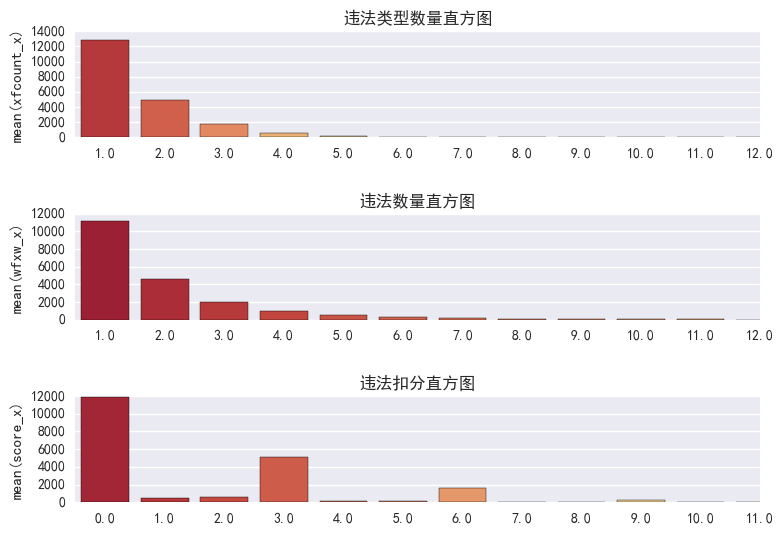

In [18]:
driver1_illegal_count=driver1_illegal.loc[driver1_illegal["jszh_x"].isnull()==False]
fig,axes=plt.subplots(3,1)
# fig.suptitle("存在违法记录的第一责任人相关直方图")
fig.set_tight_layout({"h_pad":2.})
axes[0].set_title("违法类型数量直方图")
sns.barplot(driver1_illegal_count["xfcount_x"].value_counts().index,driver1_illegal_count["xfcount_x"].value_counts()
            ,palette="RdYlGn",ax=axes[0])
axes[0].set_xlim(None,11)
axes[1].set_title("违法数量直方图")
sns.barplot(driver1_illegal_count["wfxw_x"].value_counts().index,driver1_illegal_count["wfxw_x"].value_counts()
            ,palette="RdYlGn",ax=axes[1])
axes[1].set_xlim(None,11)
axes[2].set_title("违法扣分直方图")
sns.barplot(driver1_illegal_count["score_x"].value_counts().index,driver1_illegal_count["score_x"].value_counts()
            ,palette="RdYlGn",ax=axes[2])
axes[2].set_xlim(None,11)
plt.show()
fig.savefig("illegal_hist.png")

可以看到，绝大多数司机无论是违法的类型数量还是违法次数，都仅在1到2次<br>所以相应的扣分主要集中0分和3分钟，少部分人扣了6分

E:\Anaconda\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


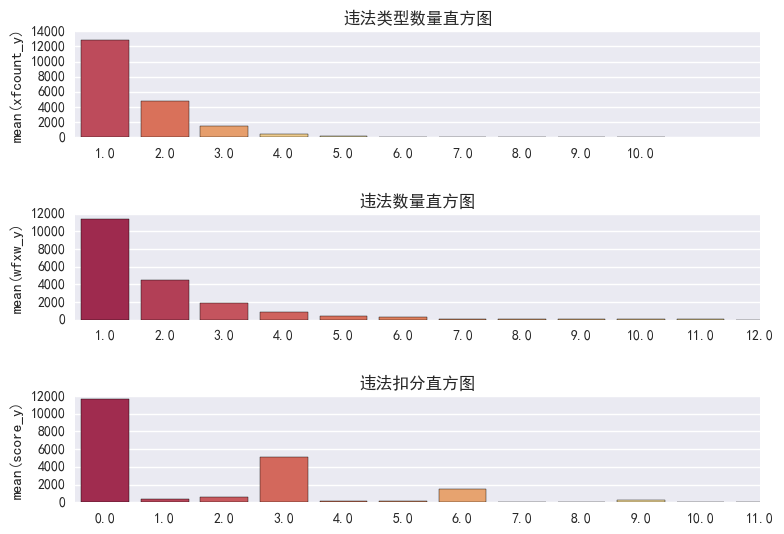

In [19]:
driver2_illegal_count=driver2_illegal.loc[driver2_illegal["jszh_y"].isnull()==False]
fig,axes=plt.subplots(3,1)
# fig.suptitle("存在违法记录的第一责任人相关直方图")
fig.set_tight_layout({"h_pad":2.})
axes[0].set_title("违法类型数量直方图")
sns.barplot(driver2_illegal_count["xfcount_y"].value_counts().index,driver2_illegal_count["xfcount_y"].value_counts()
            ,palette="Spectral",ax=axes[0])
axes[0].set_xlim(None,11)
axes[1].set_title("违法数量直方图")
sns.barplot(driver2_illegal_count["wfxw_y"].value_counts().index,driver2_illegal_count["wfxw_y"].value_counts()
            ,palette="Spectral",ax=axes[1])
axes[1].set_xlim(None,11)
axes[2].set_title("违法扣分直方图")
sns.barplot(driver2_illegal_count["score_y"].value_counts().index,driver2_illegal_count["score_y"].value_counts()
            ,palette="Spectral",ax=axes[2])
axes[2].set_xlim(None,11)
plt.show()
fig.savefig("illegal2_hist.png")

结果与第一责任的结果基本一致

In [21]:
maxtime_x=pd.to_datetime(accident_data["maxtime_x"]).dt.date
maxtime_y=pd.to_datetime(accident_data["maxtime_y"]).dt.date
# print(maxtime_x)
diff_date1=accident_data["accidenttime"]-maxtime_x
diff_date2=accident_data["accidenttime"]-maxtime_y
# print(accident_data["accidenttime"])
# print(diff_date1)
# print(diff_date2)

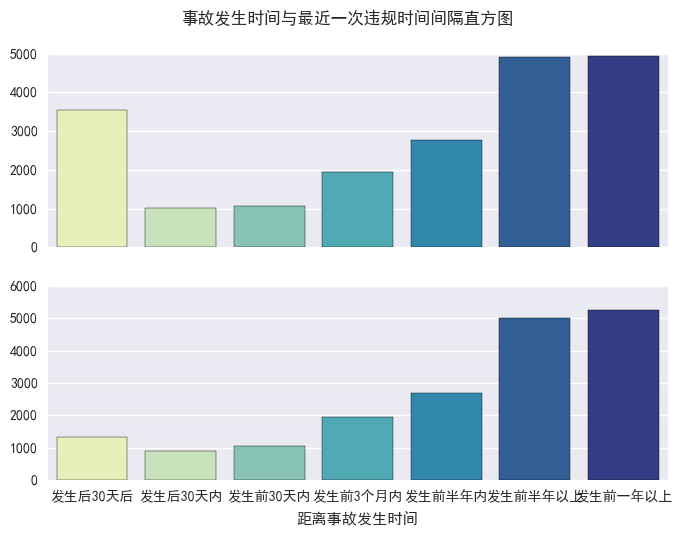

In [23]:
diff_days1=diff_date1.dt.days
diff_days2=diff_date2.dt.days
# print(diff_days1[diff_days1<0][diff_days1>-31].count())
# print(diff_days1[diff_days1>0][diff_days1<31].count())
# print(diff_days1[diff_days1>30][diff_days1<90].count())
# print(diff_days1[diff_days1>90][diff_days1<180].count())
# print(diff_days1[diff_days1>180][diff_days1<365].count())
# print(diff_days1[diff_days1>365].count())
# print(diff_days1[diff_days1<-31].count())
fig,axes=plt.subplots(2,1,sharex=True)
fig.suptitle("事故发生时间与最近一次违规时间间隔直方图")
sns.barplot(x=["发生后30天后","发生后30天内","发生前30天内","发生前3个月内","发生前半年内",
               "发生前半年以上","发生前一年以上",],y=[diff_days1[diff_days1<-31].count(),
                    diff_days1[diff_days1<0][diff_days1>-31].count(),
                    diff_days1[diff_days1>0][diff_days1<31].count(),
                    diff_days1[diff_days1>30][diff_days1<90].count(),
                    diff_days1[diff_days1>90][diff_days1<180].count(),
                    diff_days1[diff_days1>180][diff_days1<365].count(),
                    diff_days1[diff_days1>365].count()],palette="YlGnBu",ax=axes[0])
sns.barplot(x=["发生后30天后","发生后30天内","发生前30天内","发生前3个月内","发生前半年内",
               "发生前半年以上","发生前一年以上",],y=[diff_days2[diff_days1<-31].count(),
                    diff_days2[diff_days2<0][diff_days2>-31].count(),
                    diff_days2[diff_days2>0][diff_days2<31].count(),
                    diff_days2[diff_days2>30][diff_days2<90].count(),
                    diff_days2[diff_days2>90][diff_days2<180].count(),
                    diff_days2[diff_days2>180][diff_days2<365].count(),
                    diff_days2[diff_days2>365].count()],palette="YlGnBu",ax=axes[1])
plt.xlabel("距离事故发生时间")
plt.show()
fig.savefig("illegal_days_hist.png")

可以看到，绝大多数出现过违规的出现事故的司机是在违规的半年至一年的时间后出现事故的<br>
值得注意的是，出现事故后的第一责任司机在事故发生一个月后出现违规的记录较多，无论纵向还是横向

In [24]:
print(accident_data.head())

   Unnamed: 0 accidenttime accidentaddr  driver1fault driver1responsibility  \
0           0   2015-01-02          白云区             9                 负同等责任   
1           1   2015-01-05          北二环             1                 负全部责任   
2           2   2015-01-05        兴关路路口             7                 负全部责任   
3           3   2015-01-06           阳关             8                 负全部责任   
4           4   2015-01-07          望城坡             7                 负全部责任   

  driver2responsibility  sex1 platenumber1 carcolor1  sex2  ...    \
0                 负同等责任     1      贵AU2906         黑     1  ...     
1                  不负责任     1      贵A7160F         红     1  ...     
2                  不负责任     1      贵A31L88        白色     1  ...     
3                  不负责任     1      贵A8705F         黑     1  ...     
4                  不负责任     1      渝F84452        白色     1  ...     

             maxtime_x xfcount_x wfxw_x      id              jszh_y fine_y  \
0                  NaN       NaN

In [25]:
accident_data.to_csv("accident_data_merged.csv",encoding="utf-8")